# Customer Churn Prediction  -Smotting

### Importing Libraries

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score, classification_report, confusion_matrix, f1_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Importing Dataset

In [119]:
data = pd.read_csv('train_PDjVQMB.csv')

#printing the first few rows
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [56]:
#size of the data
data.shape

(6650, 11)

In [57]:
#checking missing values
data.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

data is cleaned having no missing values

# Visualization

## Distribution of Customer churn

In [58]:
data.groupby('Is_Churn')['Is_Churn'].describe()


,count,mean,std,min,25%,50%,75%,max
Is_Churn,,,,,,,,
0,5113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1537.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


0    76.887218
1    23.112782
Name: Is_Churn, dtype: float64 



<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

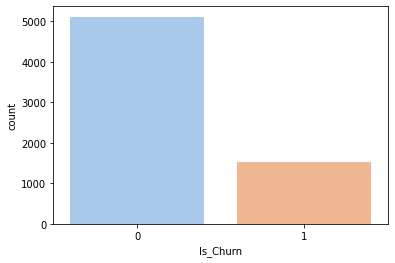

In [59]:
print(100*data['Is_Churn'].value_counts()/len(data['Is_Churn']),'\n')

sns.countplot(x='Is_Churn',data=data,palette="pastel")


Above graph showing that target variable is imbalanced.

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

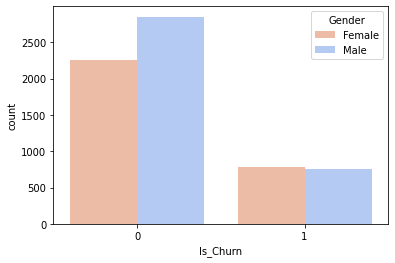

In [60]:
sns.countplot(x='Is_Churn',data=data,hue='Gender',palette="coolwarm_r")

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

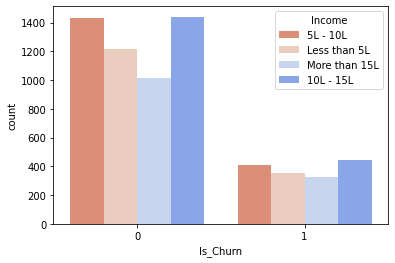

In [61]:
sns.countplot(x='Is_Churn',data=data,hue='Income',palette="coolwarm_r")

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

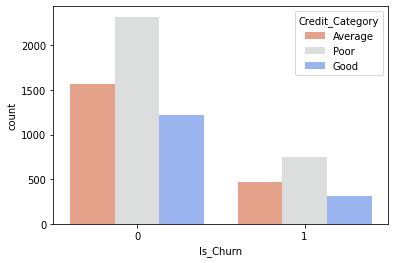

In [62]:
sns.countplot(x='Is_Churn',data=data,hue='Credit_Category',palette="coolwarm_r")

# Basic Statistics

In [63]:
data.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


Vintage, Transcation_Status and Credit_Card variables are categorical in nature.

Average Age and Balance of customer is 41 years and 8.045954e+05 Rs. respectively.


### Separating Dependent and Independent Variables

In [120]:
#independent variables
x = data.drop(["Is_Churn","ID"], axis = 1)

#dependent variables
y = data['Is_Churn']

x.shape, y.shape

((6650, 9), (6650,))

## Label Encode categorical variable

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x=x.apply(LabelEncoder().fit_transform)

In [122]:
#Split data
from sklearn.model_selection import train_test_split as tts

train_x, test_x, train_y, test_y = tts (x, y, random_state = 9 , stratify = y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4987, 9), (1663, 9), (4987,), (1663,))

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [139]:
# Xgboost model
from xgboost import XGBClassifier

In [146]:
clf = XGBClassifier(random_state=96, colsample_bytree=0.4, max_depth=7,gamma=0.2)

In [147]:
clf.fit(train_x,train_y)

C:\Users\anushree\anaconda3\envs\deeplearning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=96, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [149]:
pred=clf.predict(test_x)
print(metrics.classification_report(pred, test_y))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1561
           1       0.10      0.38      0.16       102

    accuracy                           0.75      1663
   macro avg       0.53      0.58      0.51      1663
weighted avg       0.90      0.75      0.81      1663



## Apply Smote technique

In [66]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

### Making test and training set

In [67]:
from sklearn.model_selection import train_test_split as tts

train_x, test_x, train_y, test_y = tts (x_resampled, y_resampled, random_state = 9 , stratify = y_resampled)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((3448, 9), (1150, 9), (3448,), (1150,))

## Base models 

In [68]:
#importing predictive models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

### Model Training and Predictions 

In [69]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

# Model 1 - Decision Tree

In [70]:

#DT=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
DT=DecisionTreeClassifier(random_state = 101,max_depth=9)

M1_train, M1_test = model_predictions(DT, train_x, train_y, test_x)

In [71]:
print(metrics.classification_report(M1_test, test_y))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       420
           1       0.82      0.78      0.80       730

    accuracy                           0.75      1150
   macro avg       0.73      0.74      0.74      1150
weighted avg       0.76      0.75      0.75      1150



# Model 2 - XGBoost

In [86]:
XGB= XGBClassifier(random_state=96, colsample_bytree=0.4, max_depth=8,gamma=0.2)

M2_train, M2_test = model_predictions(XGB, train_x, train_y, test_x)

C:\Users\anushree\anaconda3\envs\deeplearning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\anushree\anaconda3\envs\deeplearning\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [87]:
print(metrics.classification_report(M2_test, test_y))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       422
           1       0.90      0.85      0.87       728

    accuracy                           0.84      1150
   macro avg       0.83      0.84      0.83      1150
weighted avg       0.85      0.84      0.84      1150



## Model 3 Random forest using RandomCV

In [89]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [90]:
rf_c=RandomForestClassifier()
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(train_x,train_y)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(test_x)
print(metrics.classification_report(test_y,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.7s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.6s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   3.6s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.4s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   4.4s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

## Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X=train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# Model 4 - Logistic Regression

In [93]:
LR=LogisticRegression(random_state= 101)
M4_train, M4_test = model_predictions(LR, train_x, train_y, test_x)

In [94]:
print(metrics.classification_report(test_y,M4_test))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       463
           1       0.77      0.83      0.80       687

    accuracy                           0.75      1150
   macro avg       0.74      0.73      0.74      1150
weighted avg       0.75      0.75      0.75      1150



# Model 5 - k Nearest Neighbour

In [95]:
# k Nearest Neighbour
knn=KNeighborsClassifier()
M5_train, M5_test = model_predictions(knn, train_x, train_y, test_x)

In [96]:
print(metrics.classification_report(test_y,M5_test))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       463
           1       0.76      0.84      0.80       687

    accuracy                           0.75      1150
   macro avg       0.74      0.73      0.73      1150
weighted avg       0.74      0.75      0.74      1150



# Model 6 - Xgboost 

In [97]:
XGB2= XGBClassifier(random_state=96, colsample_bytree=0.4, max_depth=8,gamma=0.2)

M6_train, M6_test = model_predictions(XGB2, train_x, train_y, test_x)

C:\Users\anushree\anaconda3\envs\deeplearning\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [98]:
print(metrics.classification_report(test_y,M6_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       463
           1       0.85      0.90      0.87       687

    accuracy                           0.84      1150
   macro avg       0.84      0.83      0.83      1150
weighted avg       0.84      0.84      0.84      1150



# Prediction on Final test data

In [6]:
# test data
test= pd.read_csv('test_lTY72QC.csv')

In [7]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [8]:
#Label encode
from sklearn.preprocessing import LabelEncoder
test = test.drop(["ID"], axis = 1)
test=test.apply(LabelEncoder().fit_transform)


In [9]:
test.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,29,0,3,1889,2,1,1,1,0
1,15,1,1,631,2,0,1,1,0
2,4,0,0,780,0,0,1,1,1
3,20,1,2,39,0,1,1,1,2
4,27,1,3,2060,2,1,2,0,1


In [131]:
test.shape

(2851, 9)

# Feature Scaling on test data

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(test)

test = scaler.transform(test)


In [17]:
test[2]

array([-1.69028347, -1.08765874, -1.20755948, -0.7795907 , -1.49090762,
       -1.01377427,  0.70821668,  0.70357541, -0.16595162])

### Prediction with XGboost model on test data

In [108]:
XGB2= XGBClassifier(random_state=96, colsample_bytree=0.4, max_depth=8,gamma=0.2,use_label_encoder=False,eval_metric='logloss')

In [109]:
M6_train, M6_test = model_predictions(XGB2, train_x, train_y, test)

# Preparing Submission File

In [133]:
submission=pd.read_csv("sample_OoSmYo5.csv")

In [111]:
submission.head()

,ID,Is_Churn
0,55480787,1
1,9aededf2,1
2,a5034a09,1
3,b3256702,1
4,dc28adb5,1


In [134]:
xgbsimple=clf.predict(test)

In [135]:
submission['Is_Churn'] =xgbsimple #M6_test

In [136]:
submission.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0


In [137]:
submission.to_csv('xgbsmote.csv',index=False)

# Saving Final Model

Since Xgboost is performing better from other classifier models we can save xgboost model for future use.

In [117]:
import pickle

filename = 'finalxgbmodel.sav'
pickle.dump(XGB2, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))

print(load_model.score(test_x, test_y))

0.8426086956521739
